# Exploratory Data Analysis

**Business Case:** 

We must analyze the feautres present in the dataset, establish a correlation between the feautres and compressive strength, and forecast the employee performance rating based on the feautres.

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# for warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
read=r'Concrete_Data.xls'
original_data=pd.read_excel(read)
# Defining new column names
new_column_names = [
    'Cement', 
    'BlastFurnaceSlag', 
    'FlyAsh', 
    'Water', 
    'Superplasticizer', 
    'CoarseAggregate', 
    'FineAggregate', 
    'Age', 
    'CompressiveStrength'
]

# Assigning new names to DataFrame
original_data.columns = new_column_names

original_data

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


## Feature Studies 

#### In the previous analysis we concluded that there might be a positive relation between age and Compressive Strength. Let us now conduct extensive study on the same using bar plot.



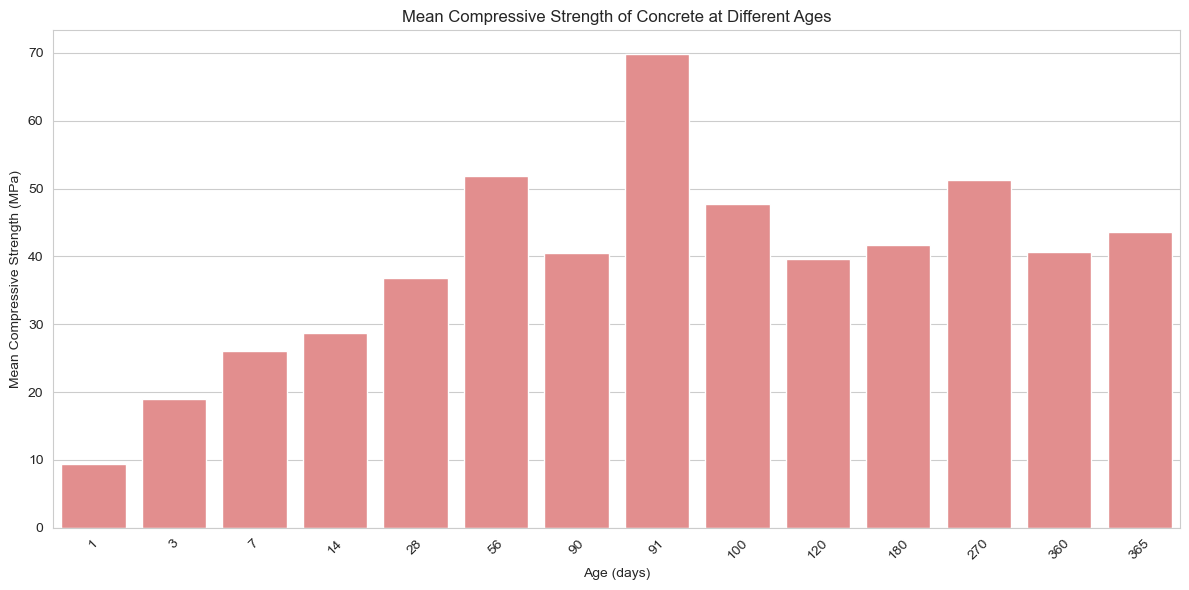

In [34]:
mean_strength_by_age = original_data.groupby('Age')['CompressiveStrength'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='CompressiveStrength', data=mean_strength_by_age, color='lightcoral')

# Set the plot title and labels
plt.title('Mean Compressive Strength of Concrete at Different Ages')
plt.xlabel('Age (days)')
plt.ylabel('Mean Compressive Strength (MPa)')


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

### Observation 
- The graph concludes that there is a positive relation between the age, the highest compressive strength is obtained at mean age of 91 days.It can also be seen that the compressive stregth becomes stable after cross the threshold value of 91 days.

## Scatter plots:
In order to  understand the trend between the features and compressive strength of mixtures.

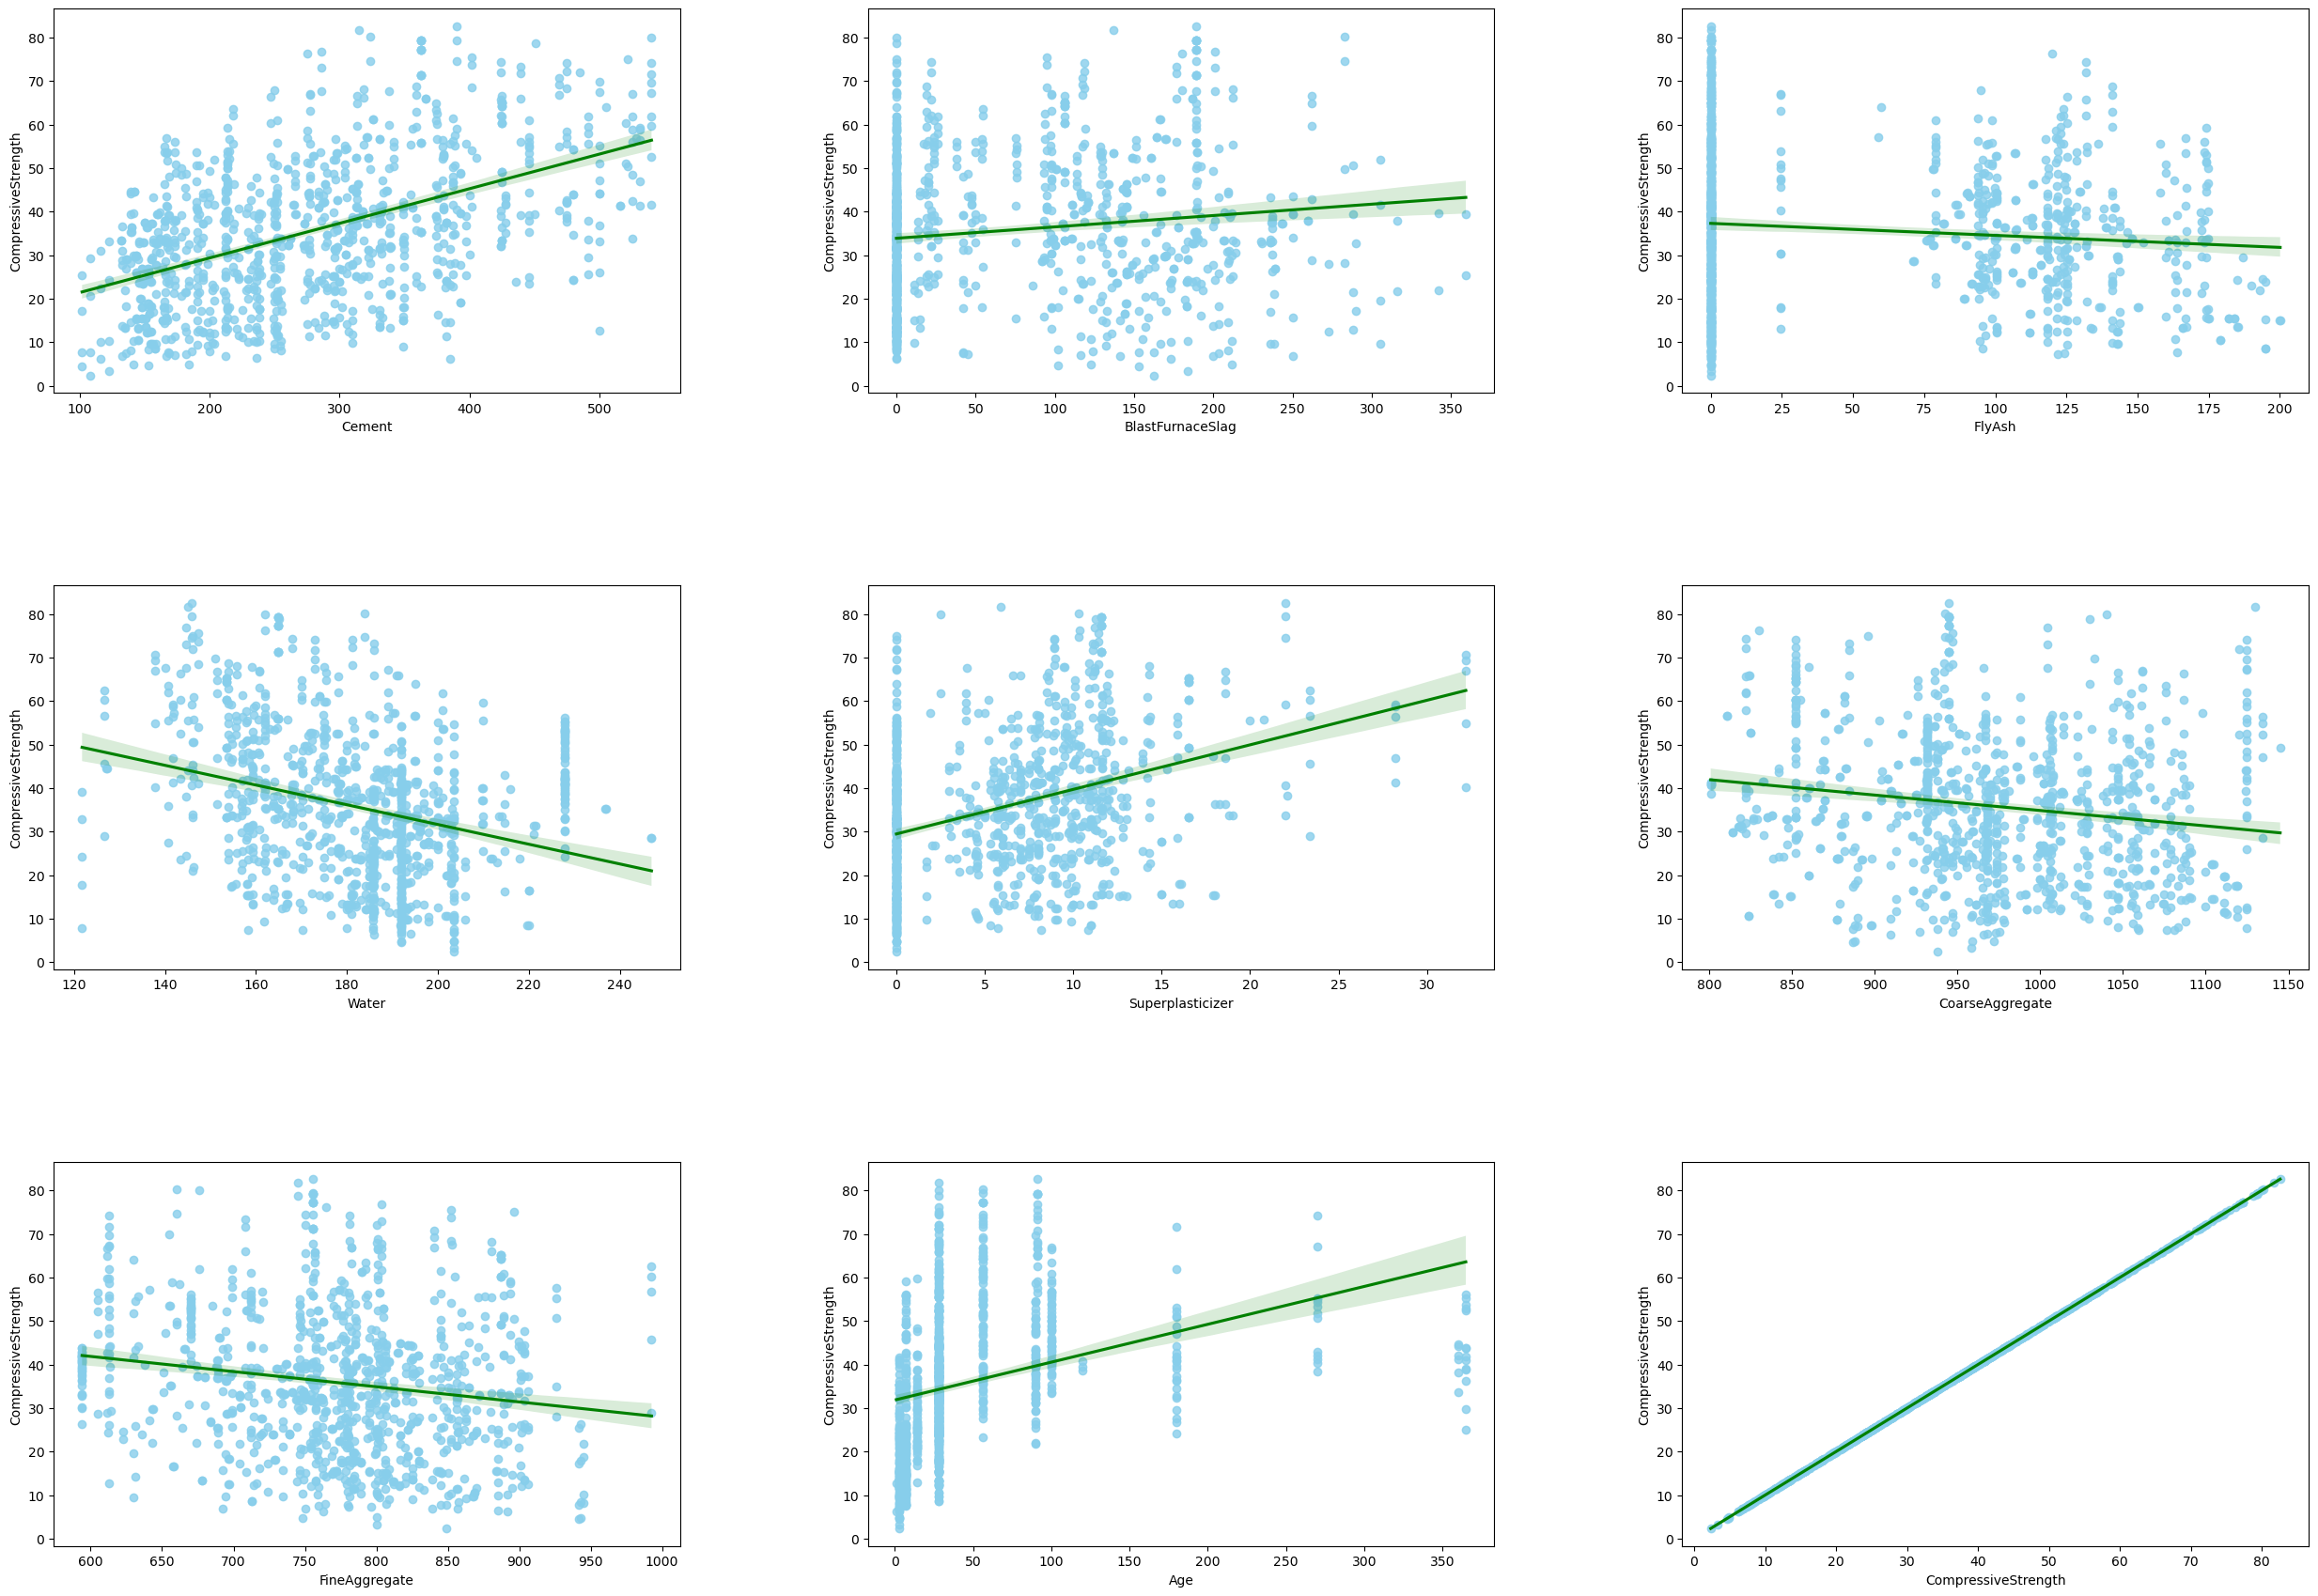

In [17]:
fig = plt.figure(figsize=(30, 50))

# Adjust the spacing between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=1.9, wspace=0.3, hspace=0.5)

# Iterate over the columns of the DataFrame
for i, col in enumerate(original_data.columns):
    # Create a new subplot
    plt.subplot(15, 3, i + 1)
    
    sns.regplot(x=col, y="CompressiveStrength", data=original_data, scatter_kws={"color": "skyblue"}, line_kws={"color": "green"})

# Display the figure
plt.show()

## Observation  
- The scatter plot is customised in order to fit a line which can be used to predict the relation between features and compressive strength of the mixture.
* The cement has a positive relation with compressive strength.
* Blast furnace slag has little positive relation with the compressive strength.
* Flyash shows slightly negtive slope with compressive strength hence depicting negative realtion with it.
* The water also show negative slope indicating negative relation betweeen the compressive strength.
* Superplasticizer has increasing trend with compressive strength.
* Coarse and Fine Agrregate has decreasing trend with the compressive strength.
* Age as discussed before show high inreasing trend with compressive strength.

These can be used in selection of feature variables after the Data cleaning and processing.

## Distributin of all the features 
- Histogram along with kde gives the distribution and nature of it. This can be used to check nature of distribuiton as well to verify the pressence of skewness and kurtosis.

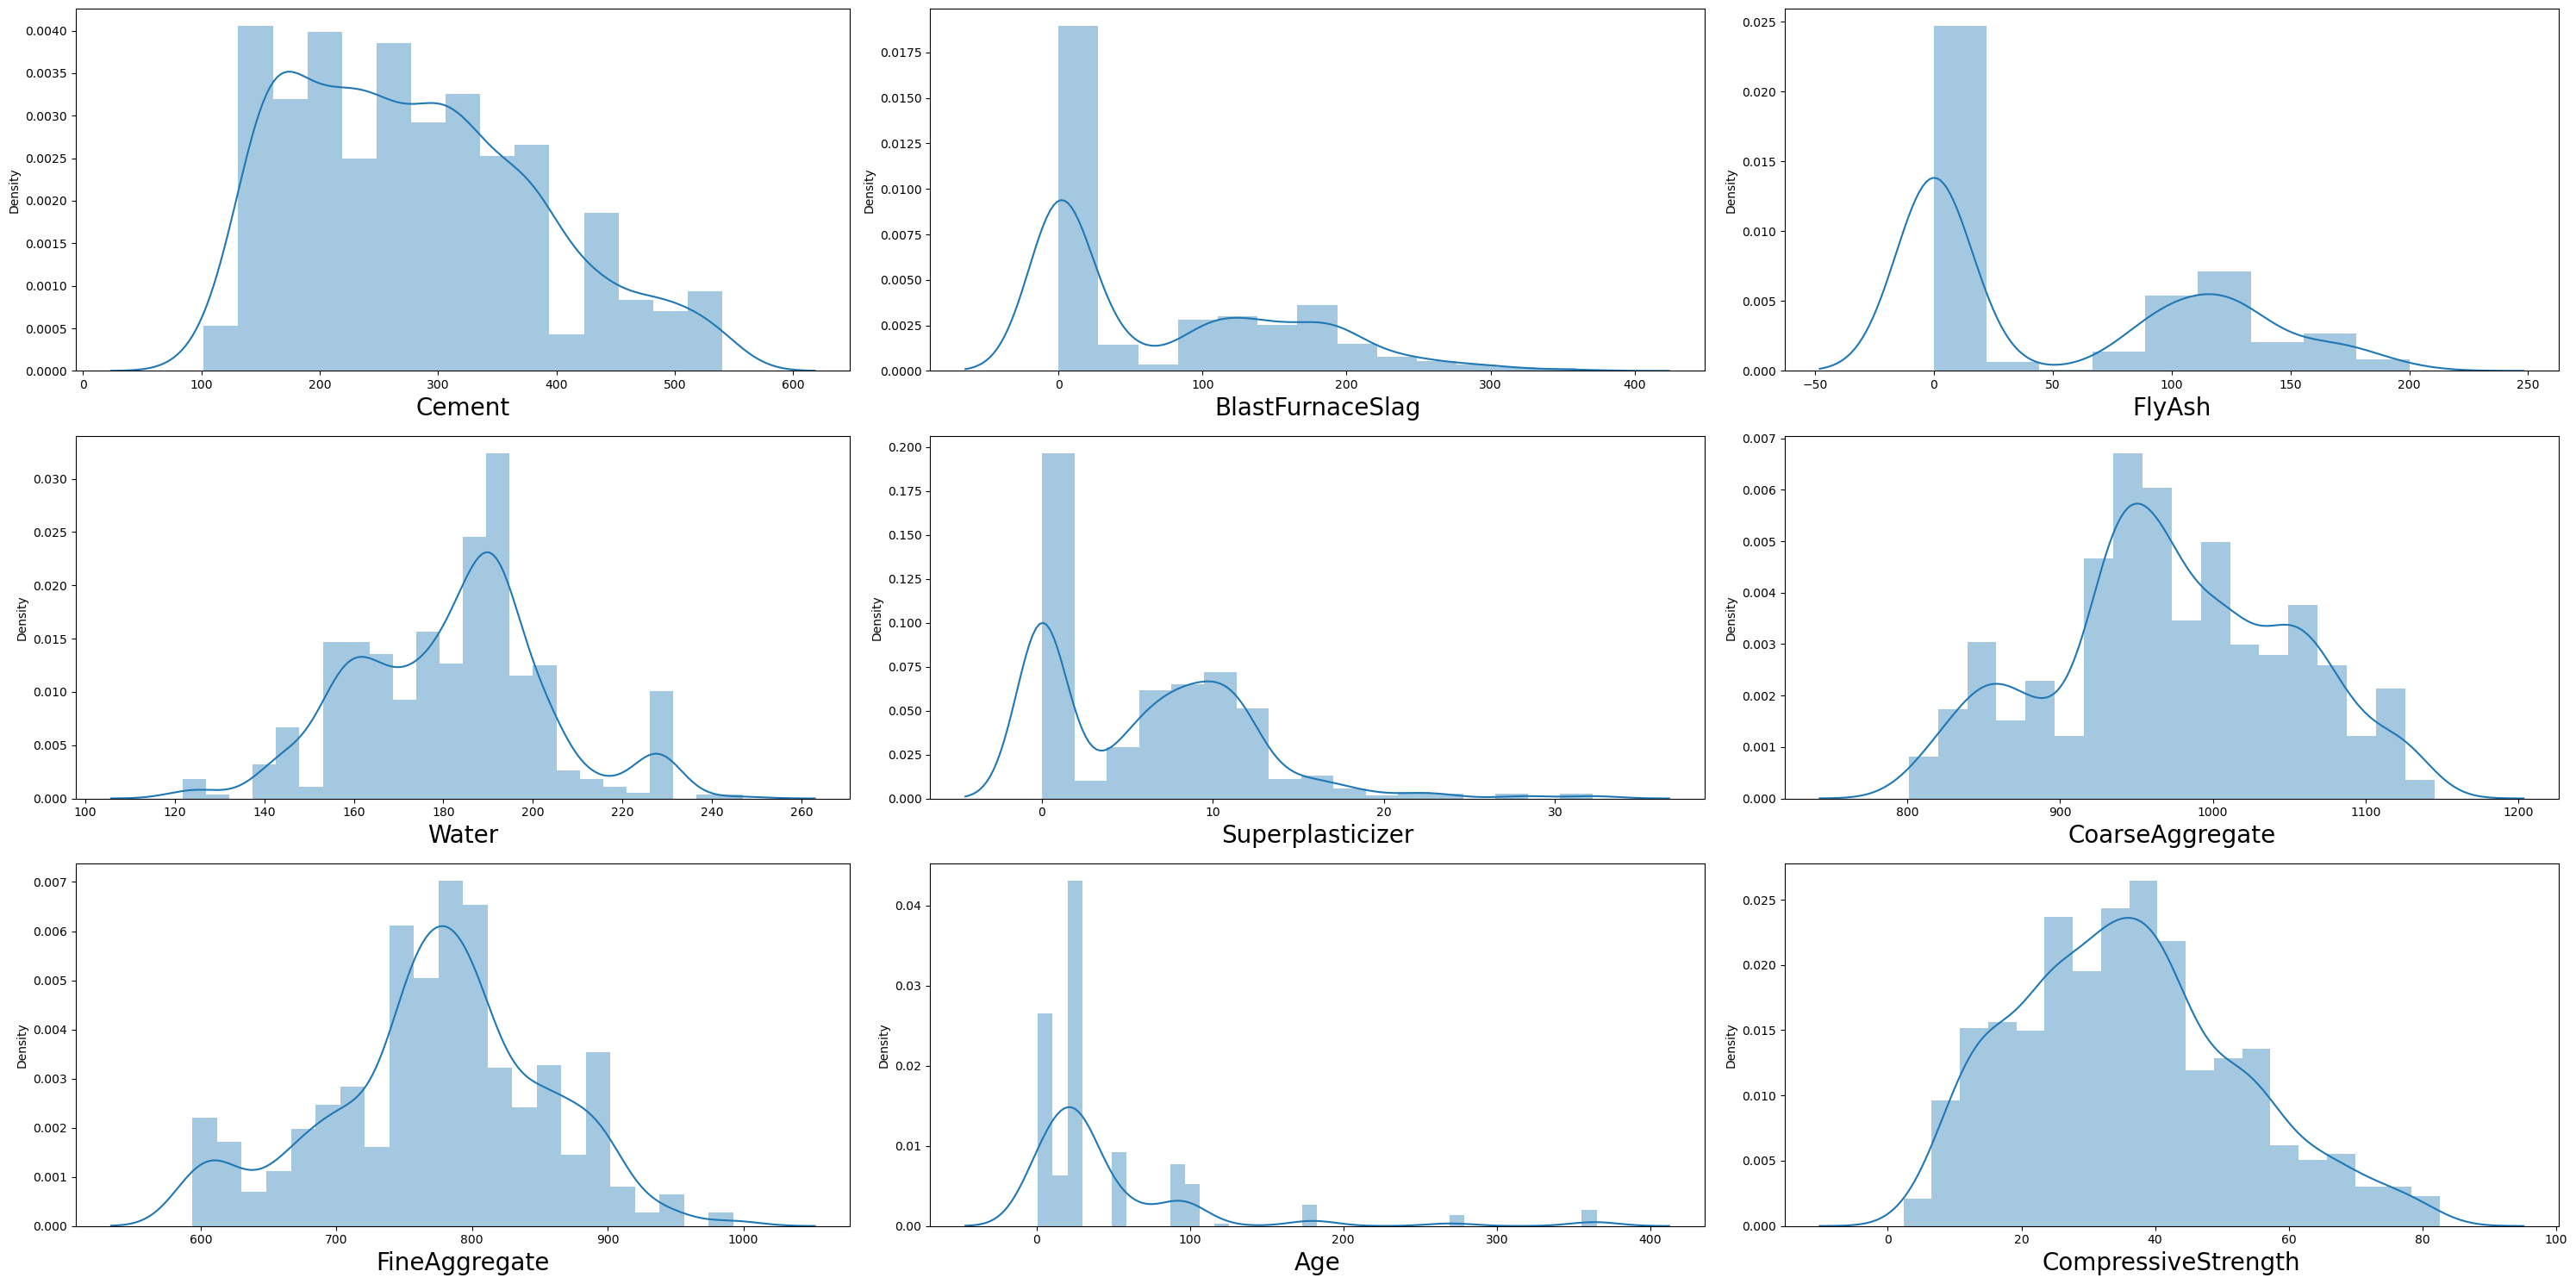

In [18]:
continuous= original_data
plt.figure(figsize=(30,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=9:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() 

## Observation  

We can draw some observations from the above distributions

1. Cement is almost normal
2. Blast furnace has two gaussian curves and right skewed distribution. It shows the pressence of outliers
3. Flyash as well has two gaussian curves and right skewed. This indicates pressence of outliers.
4. Water has gaussian distribution which slightly left skewed. 
5. Superplasticiser has gaussian distribution and rightly skewed . This indicates alot of outliers.
6. Coarse aggregate has three gaussians and almost normal.
7. Fine aggregate also has same distribution of water with a bit of right skewness.
8. Age displays multiple gaussians which indicate pressence of many outliers.
9. Compressive strngth is almost normally distributed.

## Check Skewness 

In [25]:
def skewness(data):
    for i in data.columns:
        print(f"Skewness for {i} :", data[i].skew())

In [26]:
skewness(original_data)

Skewness for Cement : 0.5095174325609817
Skewness for BlastFurnaceSlag : 0.8007373534132386
Skewness for FlyAsh : 0.5374451101484666
Skewness for Water : 0.07432397541502517
Skewness for Superplasticizer : 0.9081127314966221
Skewness for CoarseAggregate : -0.04020640266624772
Skewness for FineAggregate : -0.2529792974476521
Skewness for Age : 3.26917740063459
Skewness for CompressiveStrength : 0.4169222822701877


There is skewness in some of the features so we need to do feature engineering and removing of ouliers.

## Check For Kurtosis

### Kurtosis:

Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable.

In [27]:
def kurtosis(data):
    for i in data.columns:
        print(f"Skewness for {i} :", data[i].kurtosis())

kurtosis(original_data)

Skewness for Cement : -0.520663283893509
Skewness for BlastFurnaceSlag : -0.5081392049072306
Skewness for FlyAsh : -1.3285047848488167
Skewness for Water : 0.12267633872570016
Skewness for Superplasticizer : 1.4131856525416175
Skewness for CoarseAggregate : -0.5990005550145132
Skewness for FineAggregate : -0.10216477272184976
Skewness for Age : 12.168988978672088
Skewness for CompressiveStrength : -0.31384369170193693


From above all, kurtosis only high in three features Flyash, Superplasticiser and Age .Since Age have kutosis so we need to do feature transformation in data preprocessing.

## DISTRIBUTION OF MEAN OF DATA

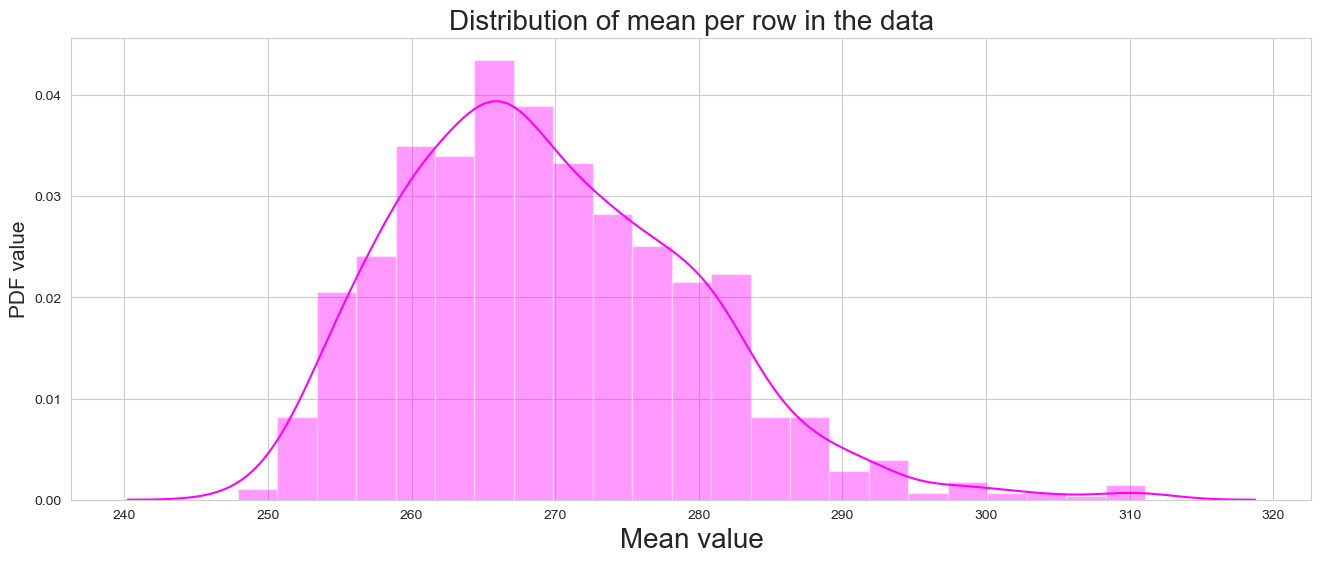

In [33]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = original_data.columns.values[0:9]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(original_data[features].mean(axis=1),color='magenta', kde=True)
plt.show()

### Observation:

* From the above graph close to guassian distribution with mean value 265

* From above graph we can say that around 80% feature mean lies between 255 to 280

## DISTRIBUTION OF STANDARD DEVIATION OF DATA

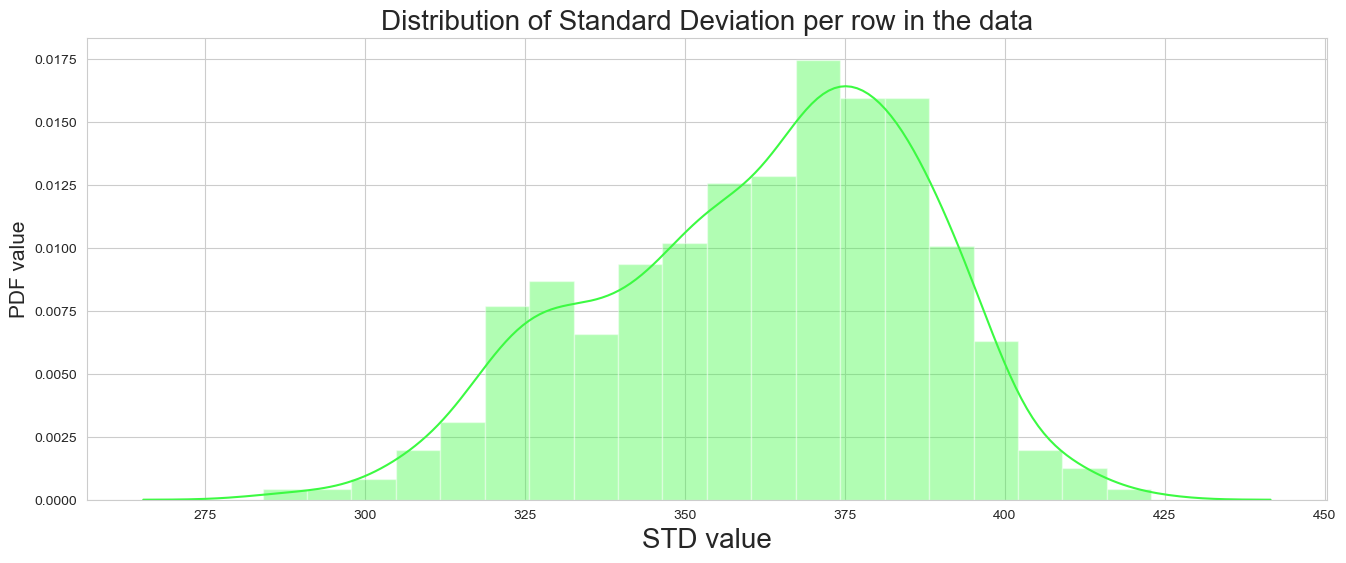

In [29]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(original_data[features].std(axis=1),color='#3CFA42', kde=True)
plt.show()

### Observation:

- The distribution of standard deviation appeares to be centered at 375 , hence the spread of values from each row arounf their own mean is around this value. 
- 80% of data lies between 325 to 385 values , this provides idea on the variability of the data
- The plots seems to have slight peak at the top, suggesting the leprokurtic distribution, where more values are close to mean compared to normal distribution 